In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set device to CUDA if available, otherwise use CPU
device = tf.device('/gpu:0' if tf.test.is_gpu_available() else '/cpu:0')



# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Reshape and normalize data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255.0



# Define the model
Net = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
Net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5',
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True
    )
]

# Train the model
history = Net.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels), callbacks=callbacks)

# Load best weights
Net.load_weights('best_model.h5')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Epoch 1/5
1875/1875 [==============================] - 139s 73ms/step - loss: 0.4072 - accuracy: 0.8497 - val_loss: 0.3256 - val_accuracy: 0.8818
Epoch 2/5
1875/1875 [==============================] - 142s 76ms/step - loss: 0.2574 - accuracy: 0.9050 - val_loss: 0.2690 - val_accuracy: 0.9051
Epoch 3/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.2141 - accuracy: 0.9196 - val_loss: 0.2581 - val_accuracy: 0.9050
Epoch 4/5
1875/1875 [==============================] - 145s 78ms/step - loss: 0.1846 - accuracy: 0.9318 - val_loss: 0.2427 - val_accuracy: 0.9131
Epoch 5/5
1875/1875 [==============================] - 136s 73ms/step - loss: 0.1583 - accuracy: 0.9405 - val_loss: 0.2342 - val_accuracy: 0.9206


In [ ]:
# Print out training and validation metrics
print("Training accuracy: ", history.history['accuracy'])
print("Validation accuracy: ", history.history['val_accuracy'])
print("Training loss: ", history.history['loss'])
print("Validation loss: ", history.history['val_loss'])

Training accuracy:  [0.8496666550636292, 0.9046666622161865, 0.9188500046730042, 0.9303833246231079, 0.9388166666030884, 0.9479666948318481, 0.9554166793823242, 0.9617833495140076, 0.9678666591644287, 0.9711666703224182, 0.9748499989509583, 0.9797666668891907, 0.9799166917800903, 0.9822666645050049, 0.9840333461761475, 0.9845499992370605, 0.985966682434082, 0.9846333265304565, 0.9887833595275879, 0.9866166710853577]
Validation accuracy:  [0.892300009727478, 0.9031999707221985, 0.9125000238418579, 0.9156000018119812, 0.9157000184059143, 0.9210000038146973, 0.9174000024795532, 0.9172999858856201, 0.9168999791145325, 0.9174000024795532, 0.919700026512146, 0.9197999835014343, 0.9157999753952026, 0.9186999797821045, 0.9179999828338623, 0.9196000099182129, 0.9151999950408936, 0.9223999977111816, 0.9175000190734863, 0.9186999797821045]
Training loss:  [0.410310298204422, 0.2583673298358917, 0.21519984304904938, 0.18516148626804352, 0.1607498973608017, 0.13643896579742432, 0.11654588580131531,

In [ ]:
Net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

# Filters / Feature Detectors

conv2d (3, 3, 1, 32)
32


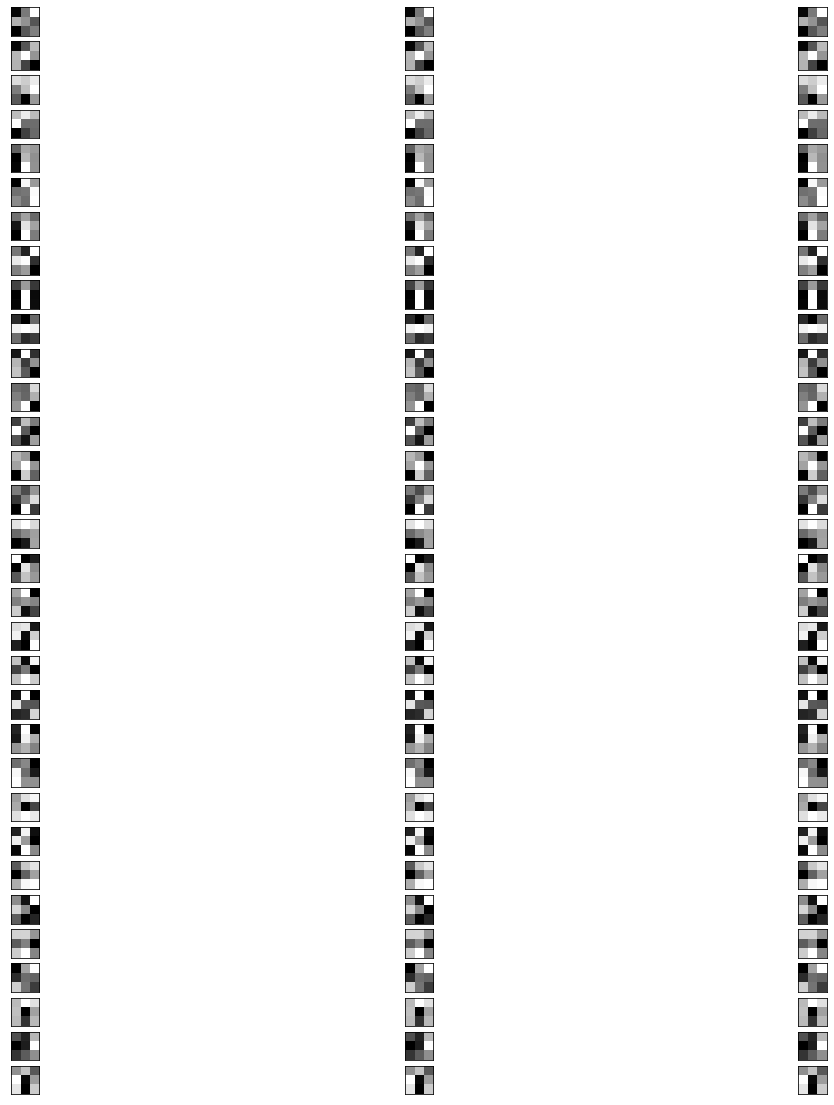

conv2d_1 (3, 3, 32, 64)
64


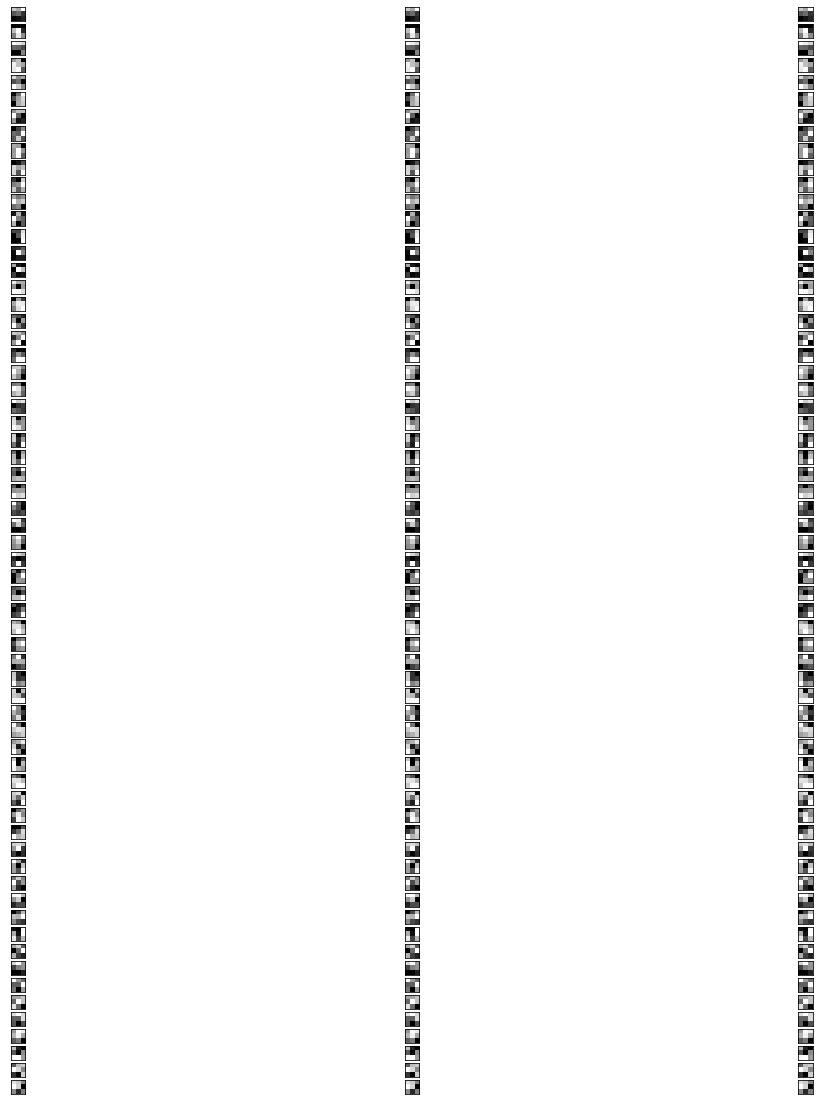

conv2d_2 (3, 3, 64, 128)
128


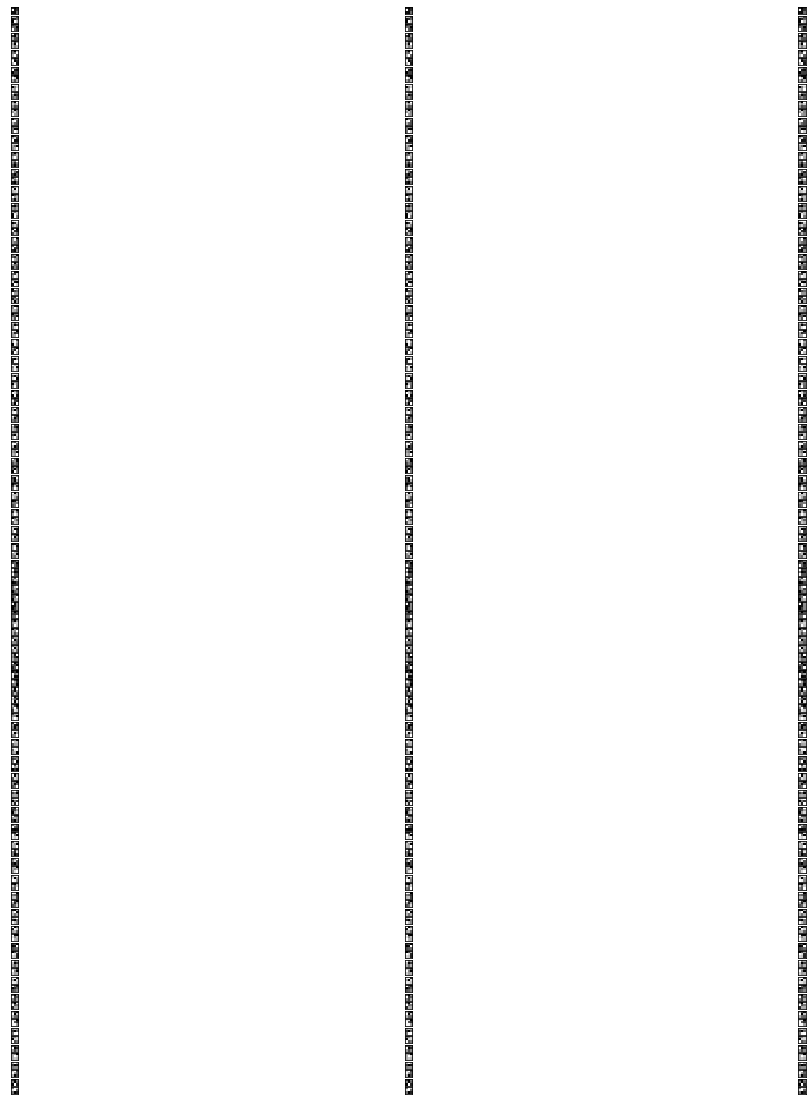

In [ ]:
#Iterate thru all the layers of the model
for layer in Net.layers:
    if 'conv' in layer.name:
        weights, bias = layer.get_weights()
        print(layer.name, weights.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        fig, axs = plt.subplots(filters.shape[3], filters.shape[0], figsize=(20, 20))
        for i in range(filters.shape[3]):
            #get the filters
            filt = filters[:, :, :, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                axs[i, j].set_xticks([])
                axs[i, j].set_yticks([])
                axs[i, j].imshow(filt[:, :, 0], cmap='gray', interpolation='nearest')
        plt.show()


## I have written my **summary** of the layer activation result observations at **"Activation Layers MNIST with Model"** google colab notebook. 

#**Noisy images**: 

## **Observation**: The model, Net, which has one more conv layer than Model performs poorly on a noisy image than Model on the paper. 

## Adding more convolutional layers to a neural network may not always lead to better performance on noisy images. There are a few reasons for this. Firstly, when a model has too many convolutional layers, it can become too specialized to the training data and overfit, meaning it doesn't generalize well to new data. Secondly, each convolutional layer filters and processes the image, but too many layers can lead to the loss of important information in the image. Thirdly, noise in the image can be amplified as it passes through each layer, degrading the image output. Lastly, models with more convolutional layers require more training data to learn meaningful patterns in the data. If the training data is not representative of the test data, the model may perform poorly on noisy images. Overall, while adding more convolutional layers can improve performance in some cases, other factors must also be considered to avoid poor performance on noisy images.

# **Real Test Data Fashion-MNIST Activations** : 

## Compared to the Fashion-MNIST Model layer activations, Net model gives higher layer activations which is natural since it also has higher prediction accuracy. 

## In this particular dataset with Net model, the last layer of Net gives high activation of the layer which means it is more sensitive to complex features than Model.  
 
##**Feature Maps Real Images**

313/313 [==============================] - 12s 37ms/step
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(3, 3, 128)


<ipython-input-4-1c4e62f21972>:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure( figsize=(scale * n_features, scale) )


(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)


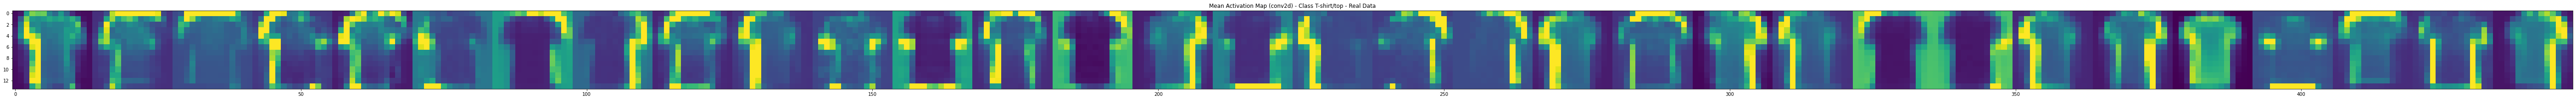

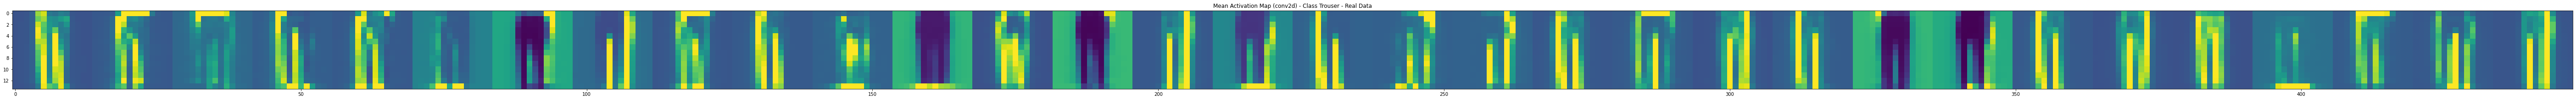

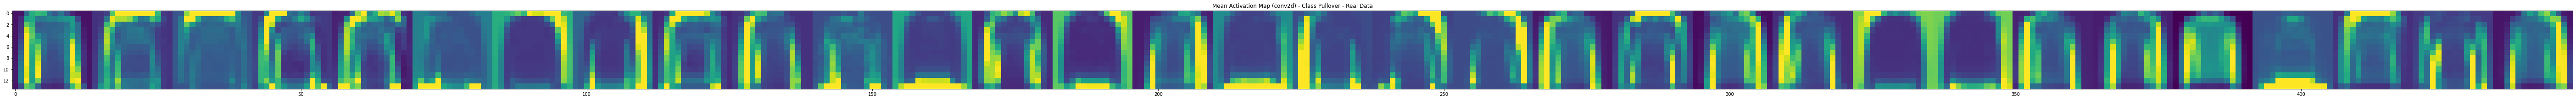

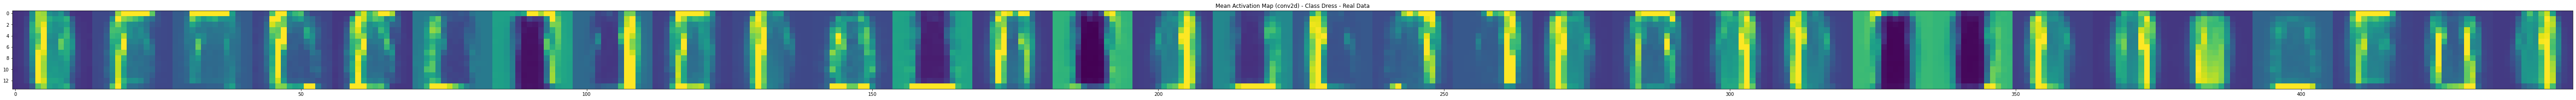

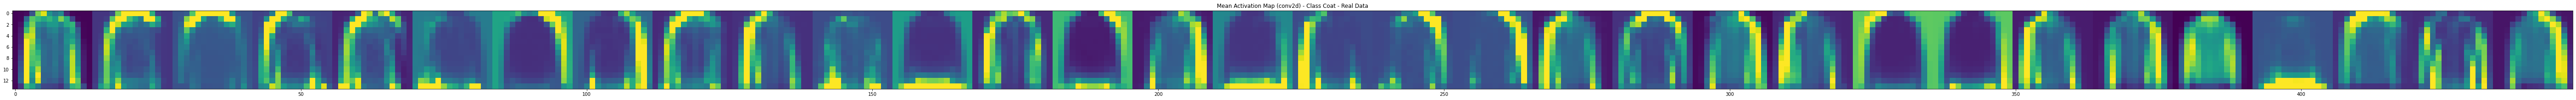

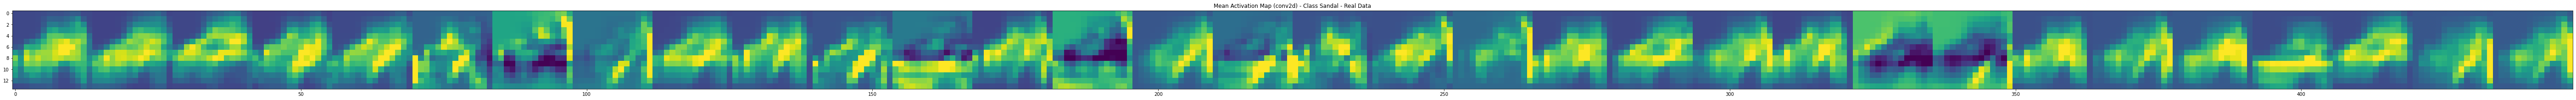

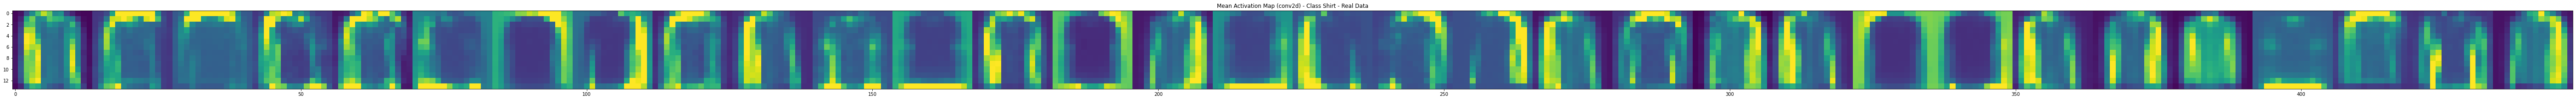

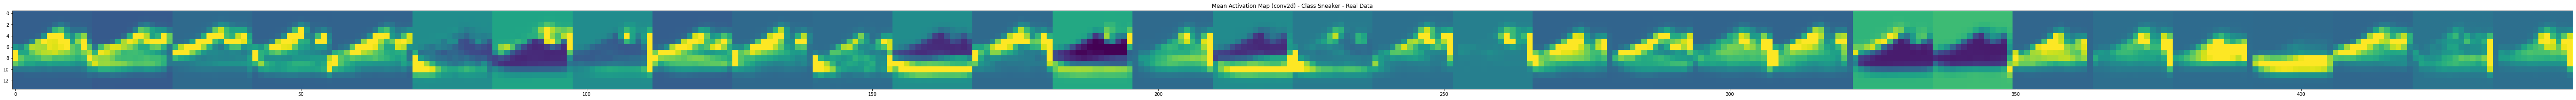

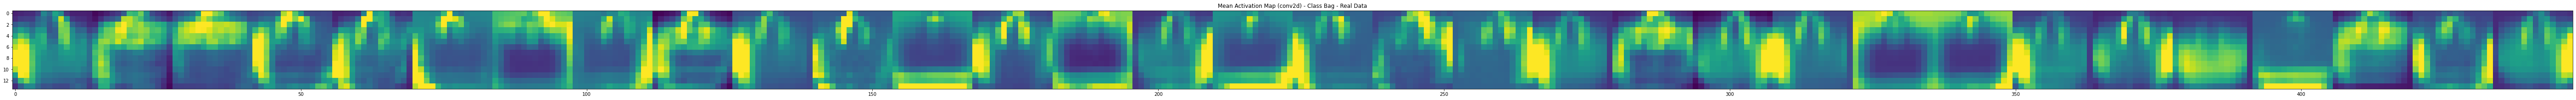

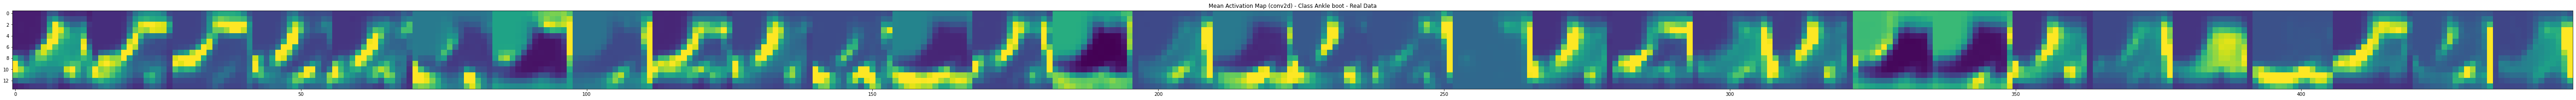

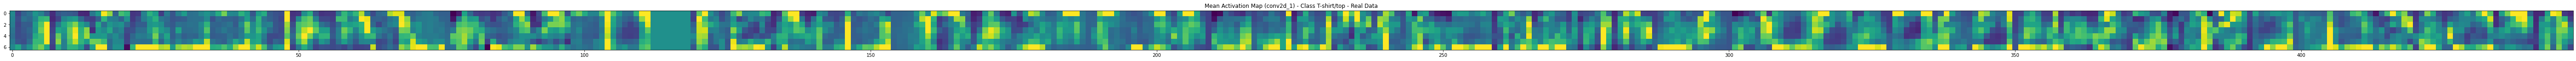

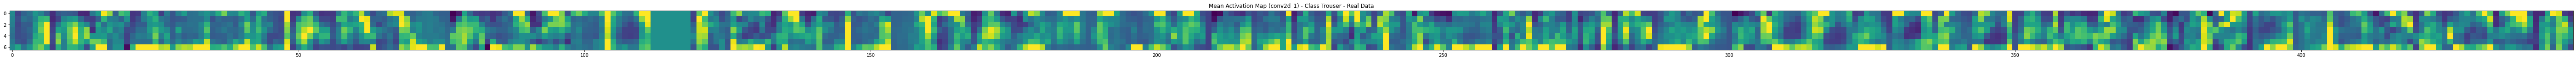

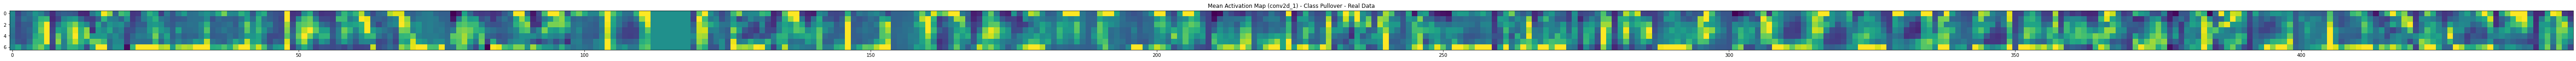

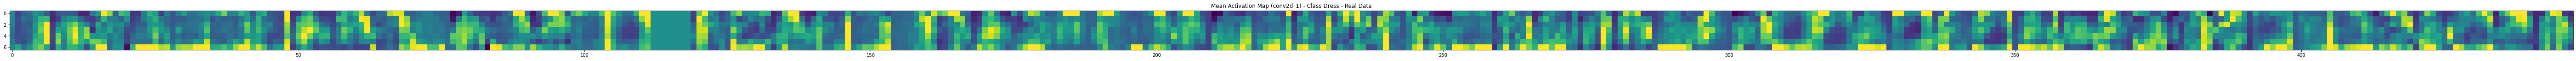

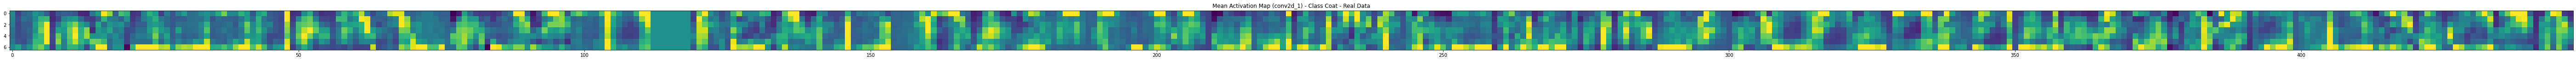

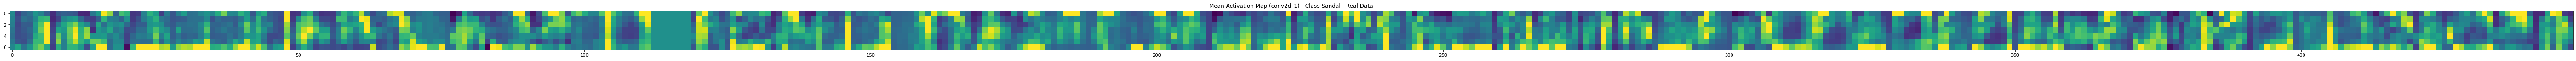

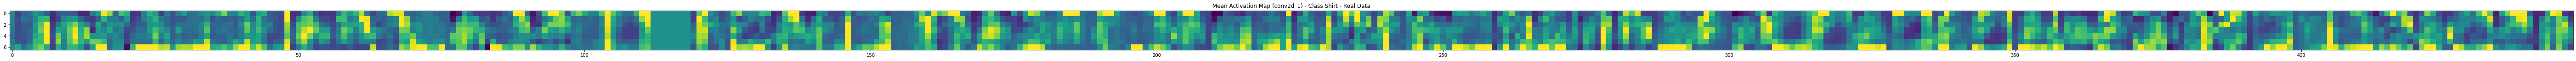

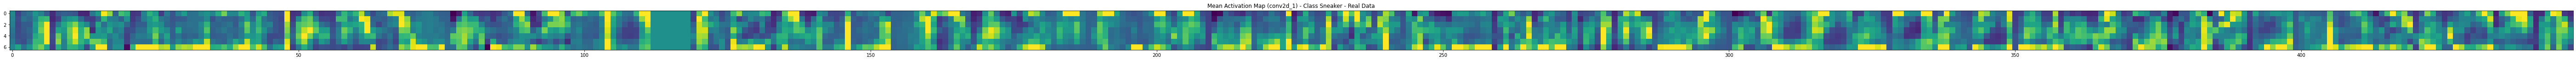

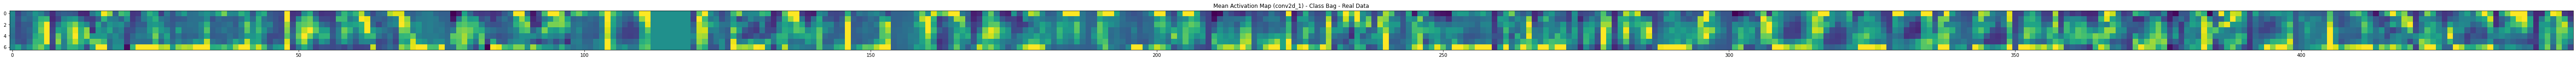

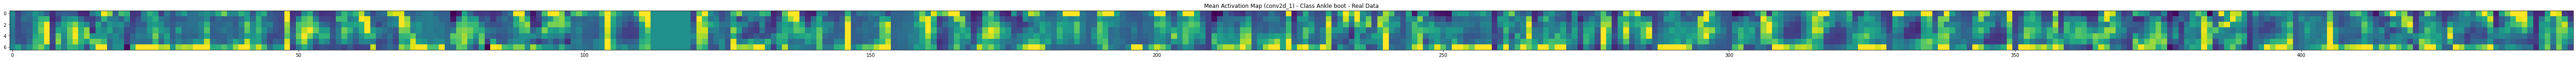

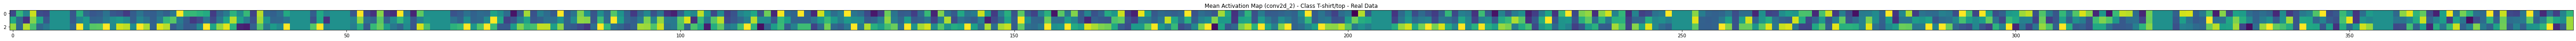

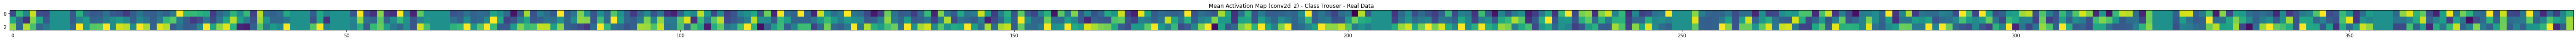

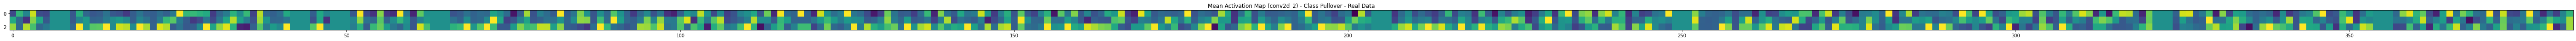

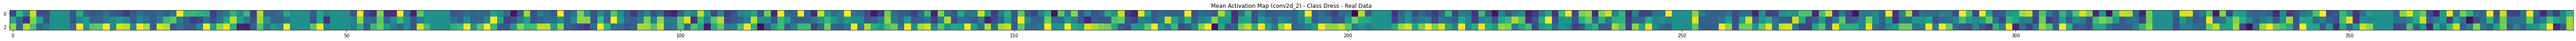

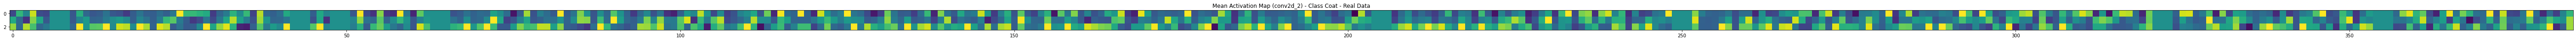

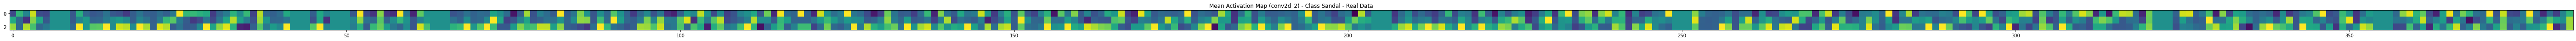

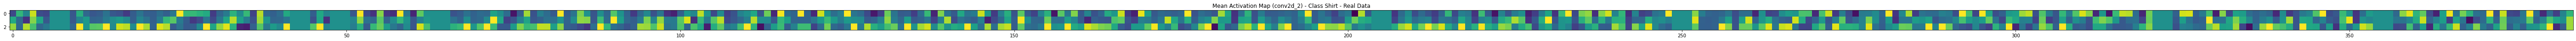

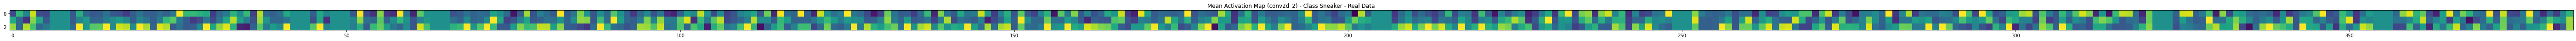

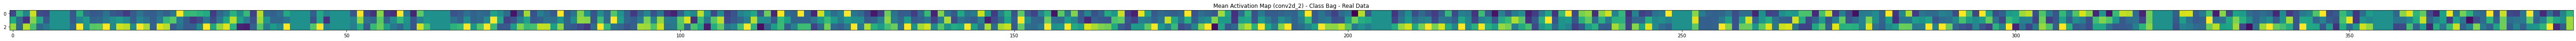

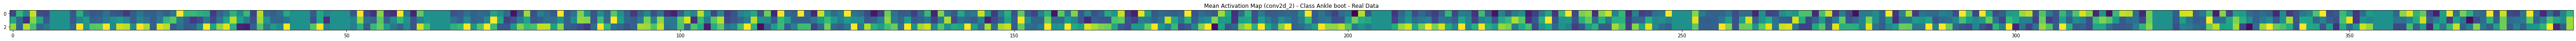

In [4]:
# Create a new array to store the reshaped images
input_images = np.zeros((test_images.shape[0], 28, 28, 1))

# Reshape each image to (1, 28, 28, 1) and store in input_images
for i in range(test_images.shape[0]):
    input_images[i] = test_images[i].reshape(28, 28, 1)

# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in Net.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=Net.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(input_images)

# Retrieve the names of the layers
layer_names = [layer.name for layer in Net.layers]

# Loop over the layers
for layer_name, feature_map_real in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_real.shape[-1]

# Define class item names
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  # Convert labels to one-hot encoded vectors
  num_classes = len(class_names)
  train_labels = keras.utils.to_categorical(train_labels, num_classes)
  test_labels = keras.utils.to_categorical(test_labels, num_classes)
# Loop over the item classes
  for class_idx, class_name in enumerate(class_names):
    # Select the indices of the images that belong to the current item class
      target_indices = np.where(test_labels[:, class_idx] == 1)[0]
      feature_maps_real = feature_map_real[target_indices]


    # Get the mean activation maps for real data and noise data separately
      mean_activation_map_real = np.mean(feature_maps_real, axis=(0))

      print(mean_activation_map_real.shape)
      if len(mean_activation_map_real.shape) == 3:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
        n_features = mean_activation_map_real.shape[-1]  # number of features in the feature map
        size = mean_activation_map_real.shape[1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
        for i in range(n_features):
            x  = mean_activation_map_real[:, :, i]
            x -= x.mean()
            x_std = x.std()
            x /= (x_std + 1e-7)
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
        scale = 100. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( f"Mean Activation Map ({layer_name}) - Class {class_names[class_idx]} - Real Data" )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

313/313 [==============================] - 6s 20ms/step


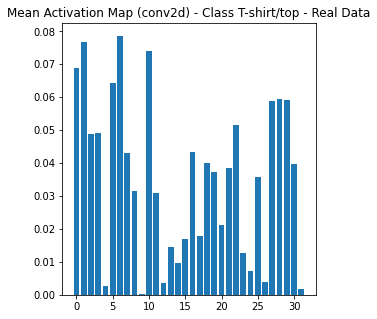

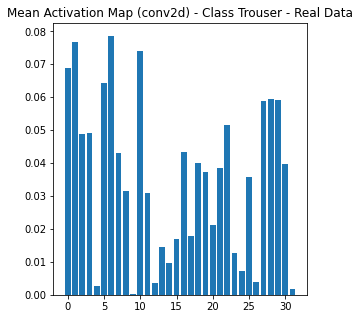

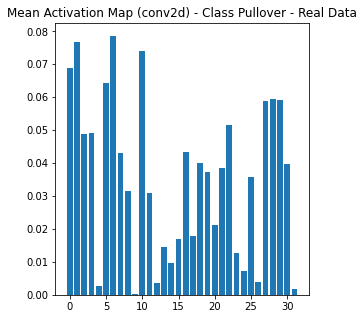

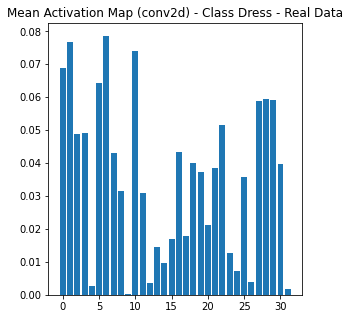

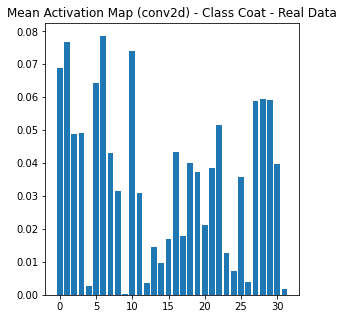

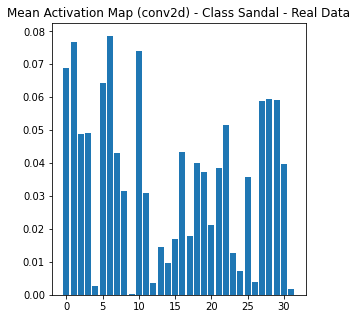

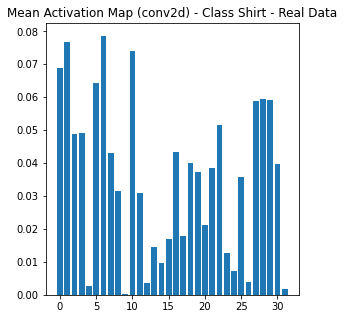

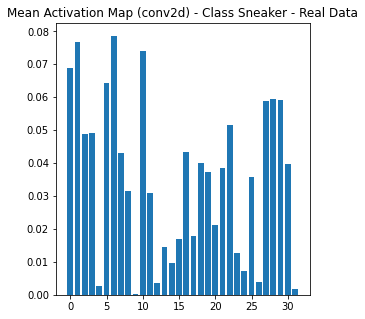

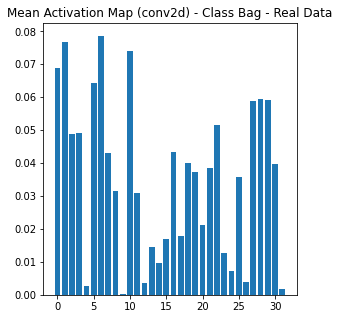

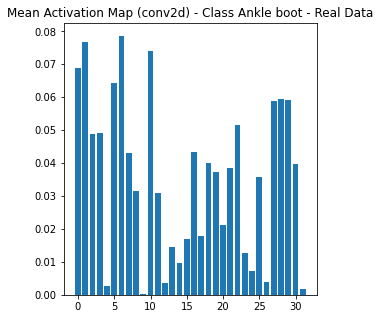

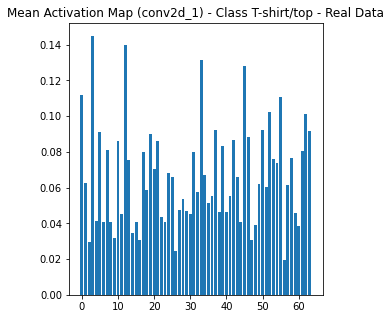

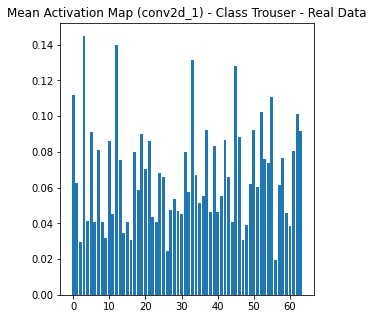

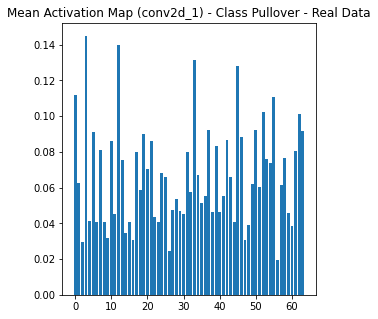

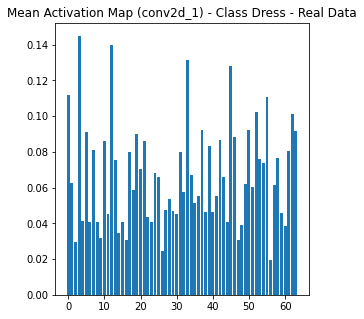

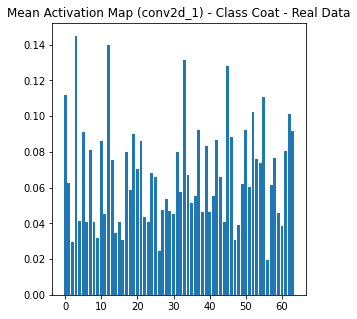

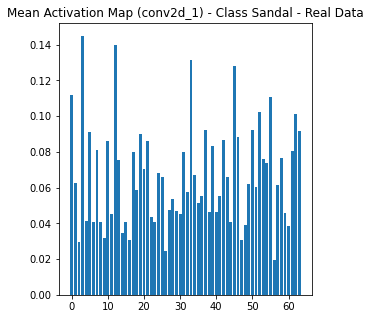

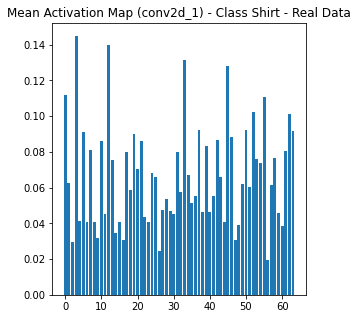

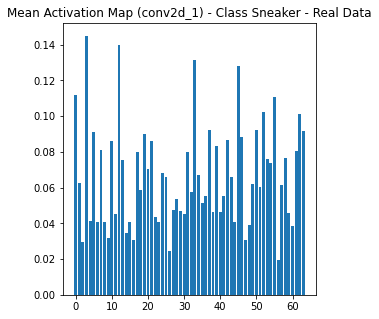

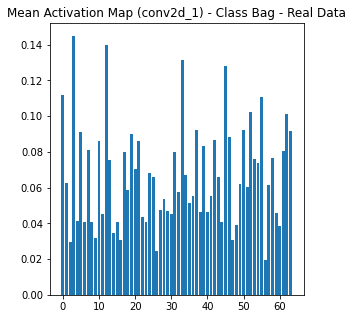

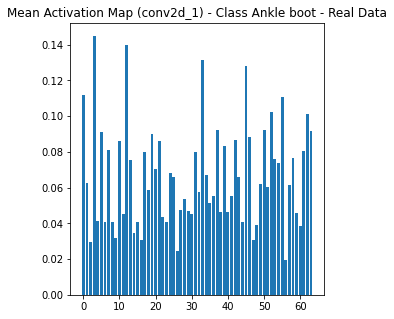

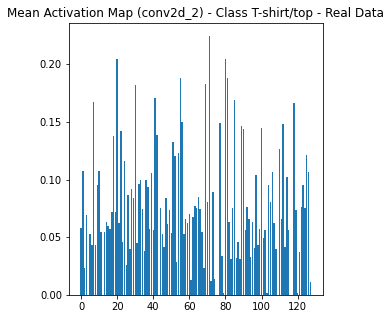

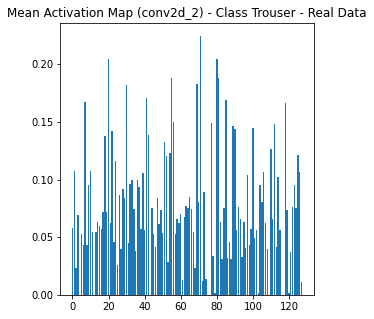

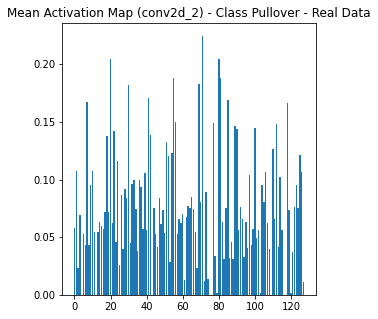

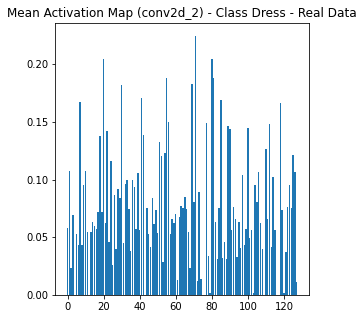

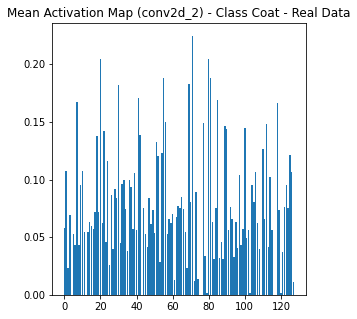

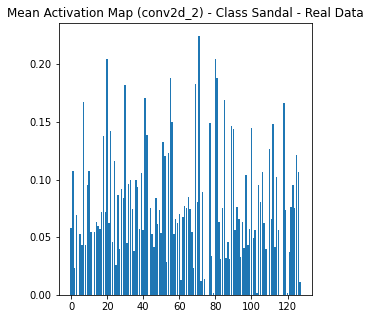

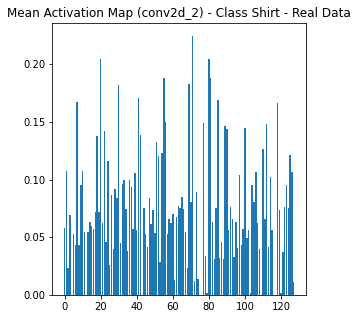

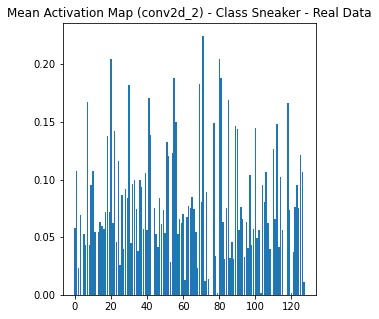

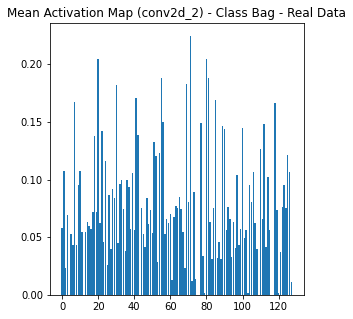

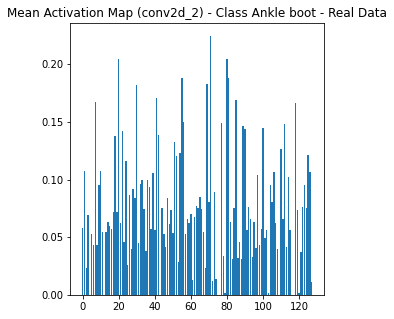

In [ ]:
# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in Net.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=Net.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(test_images)

# Retrieve the names of the layers
layer_names = [layer.name for layer in Net.layers]

# Loop over the layers
for layer_name, feature_map_real in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_real.shape[-1]

  # Define class item names
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Loop over the item classes
  for class_idx, class_name in enumerate(class_names):
    # Select the indices of the images that belong to the current item class
      target_indices = np.where(test_labels[:, class_idx] == 1)[0]
      feature_maps_real = feature_map_real[target_indices]

    # Get the mean activation maps for real data and noise data separately
      mean_activation_map_real = np.mean(feature_maps_real, axis=(0,1,2))

    # Plot the mean activation maps for real and noise data side by side
      plt.figure(figsize=(10,5))
      plt.subplot(1,2,1)
      plt.title(f"Mean Activation Map ({layer_name}) - Class {class_names[class_idx]} - Real Data")
      plt.bar(range(n_filters), mean_activation_map_real)
      plt.show()

# **Noisy image mean activation maps**


### The noisy images: all_noise_maps

In [ ]:
# Define the gamma value
gamma = 0.2

# Define the number of samples and image shape
n_samples = 500
img_shape = (28, 28)

# Define the classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
           'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define transformation to normalize the data
transform = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load test dataset
(test_images, test_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
testset = tf.data.Dataset.from_tensor_slices((test_images.reshape(-1, 28, 28, 1), test_labels))

def generate_noise_maps_per_class(cls, n_samples, gamma, img_shape=(28, 28)):
    noise_maps = []
    labels = []
    class_indices = np.where(np.array(test_labels) == cls)[0]
    class_indices = class_indices[:n_samples]
    print(f"Number of images for class {classes[cls]}: {len(class_indices)}")
    for idx in class_indices:
        # Get original image
        img = test_images[idx]
        # Generate random noise
        noise = np.random.randn(*img_shape)
        # Combine noise with original image
        noisy_img = gamma * noise + (1 - gamma) * img
        noise_maps.append(noisy_img)
        labels.append(cls)
    return np.array(noise_maps) , np.array(labels)

# Generate noise maps for each class and average them
noise_maps=[]
avgd_noise_maps = []
labels = []
for cls in range(len(classes)):
    class_noise_maps , class_names = generate_noise_maps_per_class(cls, n_samples, gamma, img_shape=(28,28))
    avg_noise_map = np.mean(class_noise_maps, axis=0)
    avgd_noise_maps.append(avg_noise_map)
    noise_maps.append(class_noise_maps)
    labels.append(class_names)

all_noise_maps = np.concatenate(noise_maps)
all_labels = np.concatenate(labels)


Number of images for class T-shirt/top: 500
Number of images for class Trouser: 500
Number of images for class Pullover: 500
Number of images for class Dress: 500
Number of images for class Coat: 500
Number of images for class Sandal: 500
Number of images for class Shirt: 500
Number of images for class Sneaker: 500
Number of images for class Bag: 500
Number of images for class Ankle boot: 500


## **Feature Maps**

157/157 [==============================] - 3s 20ms/step
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(14, 14, 32)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(7, 7, 64)
(3, 3, 128)
(3, 3, 128)


<ipython-input-9-55d1b0486ce6>:65: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure( figsize=(scale * n_features, scale) )


(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)
(3, 3, 128)


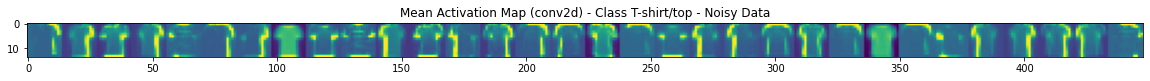

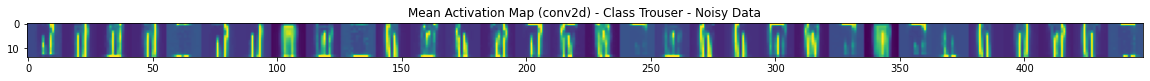

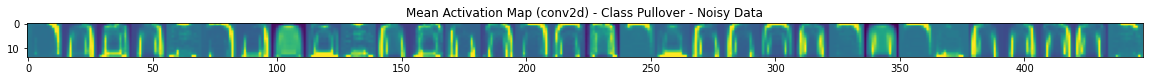

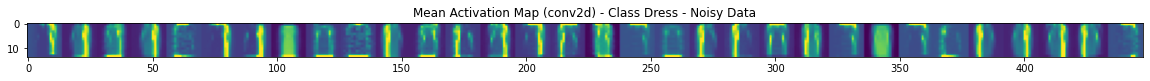

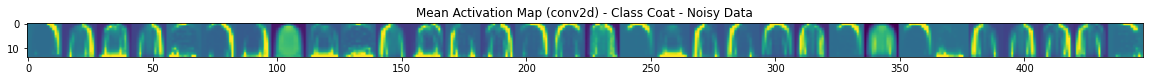

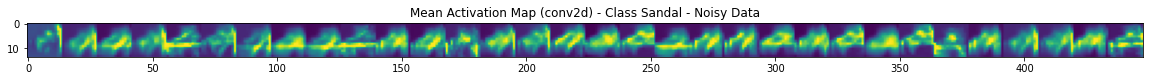

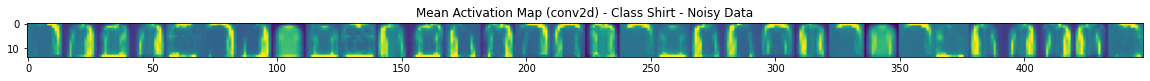

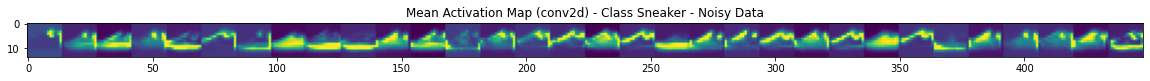

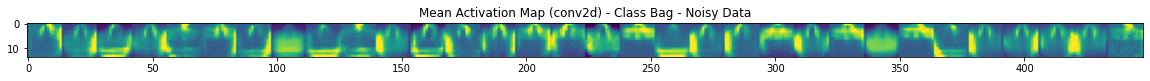

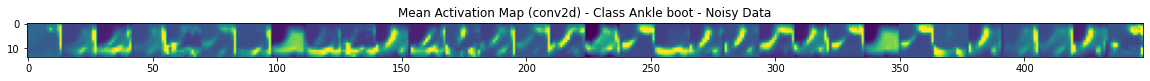

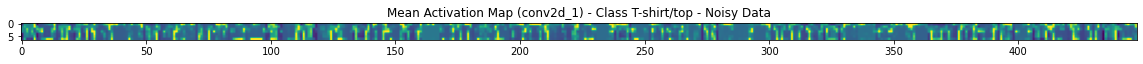

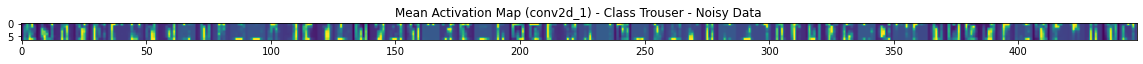

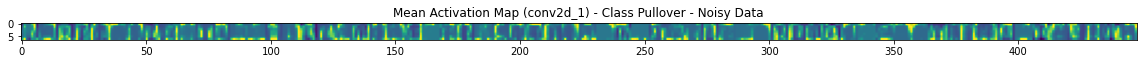

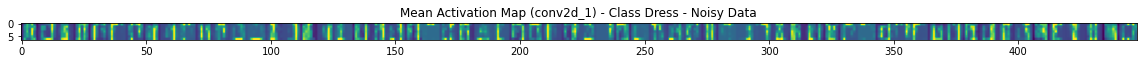

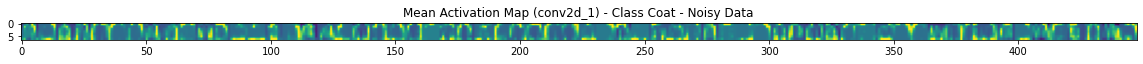

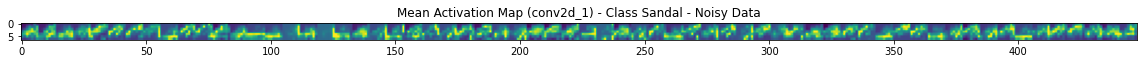

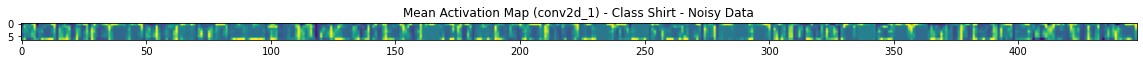

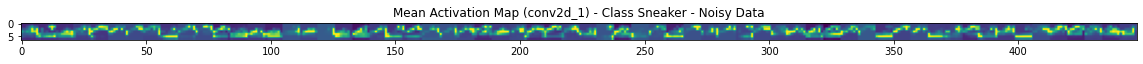

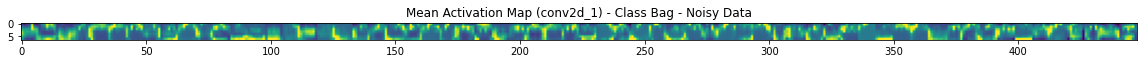

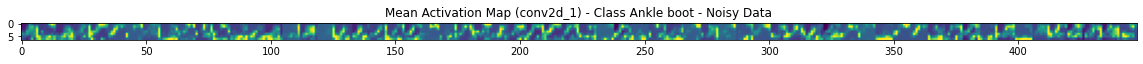

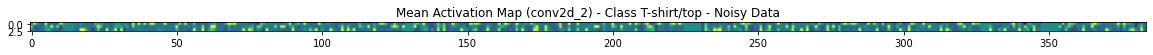

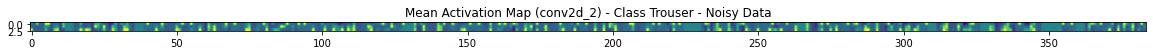

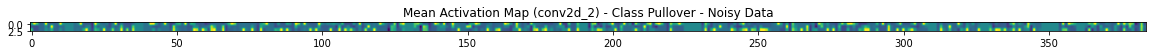

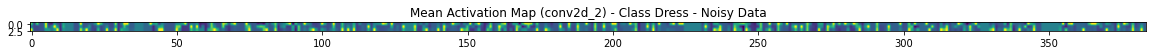

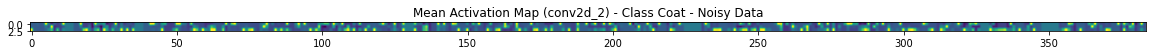

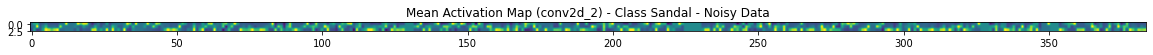

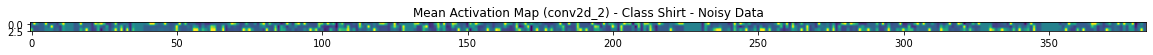

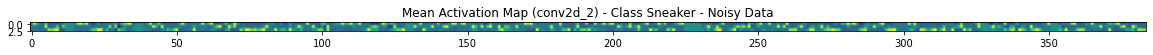

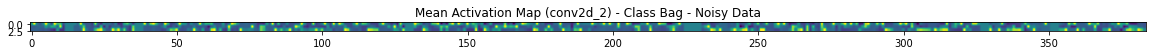

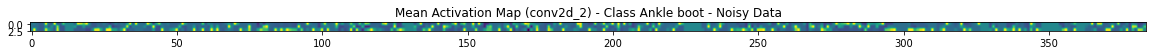

In [ ]:
# Create a new array to store the reshaped images
input_images = np.zeros((all_noise_maps.shape[0], 28, 28, 1))

# Reshape each image to (1, 28, 28, 1) and store in input_images
for i in range(all_noise_maps.shape[0]):
    input_images[i] = all_noise_maps[i].reshape(28, 28, 1)

# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in Net.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=Net.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(input_images)

# Retrieve the names of the layers
layer_names = [layer.name for layer in Net.layers]

# Loop over the layers
for layer_name, feature_map_real in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_real.shape[-1]

  # Define class item names
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  # Define the digits to generate noise maps for
  num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  # Loop over the classes
  for class_idx in num_classes:
    # Select the feature maps that correspond to the target class
    target_indices = np.where(all_labels == class_idx)[0]
    feature_maps_real = feature_map_real[target_indices]

    # Get the mean activation maps for real data and noise data separately
    mean_activation_map_real = np.mean(feature_maps_real, axis=(0))

    print(mean_activation_map_real.shape)
    if len(mean_activation_map_real.shape) == 3:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
      n_features = mean_activation_map_real.shape[-1]  # number of features in the feature map
      size = mean_activation_map_real.shape[1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
      display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
      for i in range(n_features):
          x  = mean_activation_map_real[:, :, i]
          x -= x.mean()
          x_std = x.std()
          x /= (x_std + 1e-7)
          x *=  64
          x += 128
          x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
      scale = 20. / n_features
      plt.figure( figsize=(scale * n_features, scale) )
      plt.title ( f"Mean Activation Map ({layer_name}) - Class {class_names[class_idx]} - Noisy Data")
      plt.grid  ( False )
      plt.imshow( display_grid, aspect='auto', cmap='viridis' )

157/157 [==============================] - 5s 29ms/step


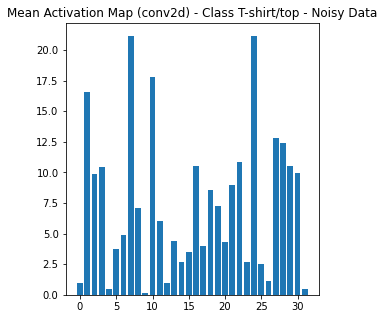

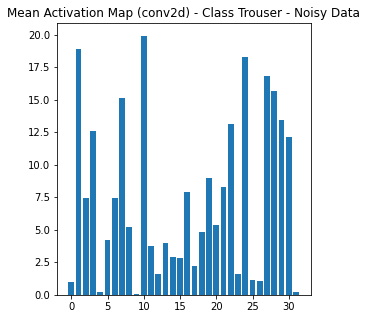

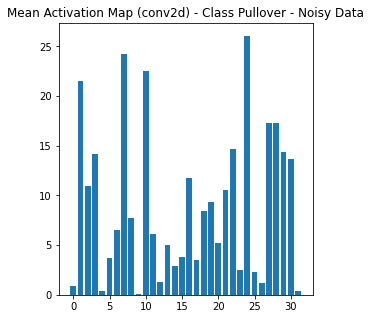

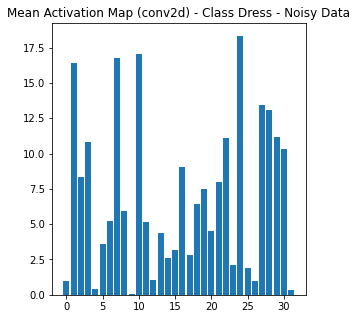

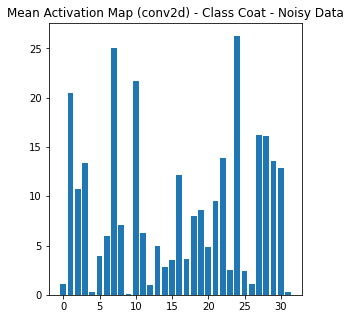

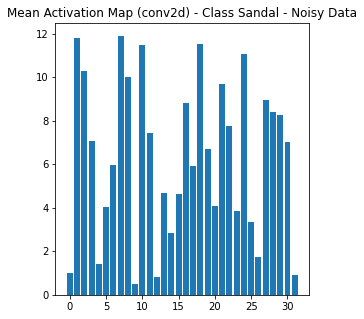

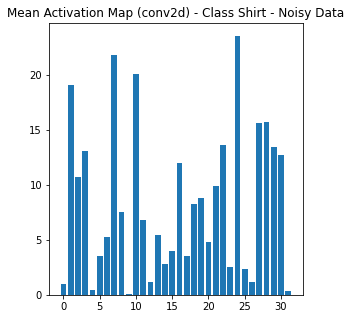

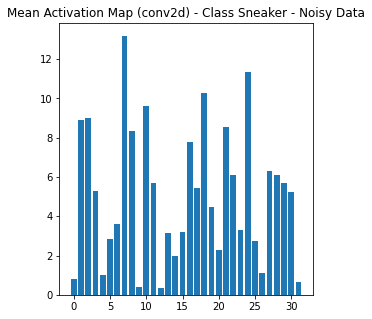

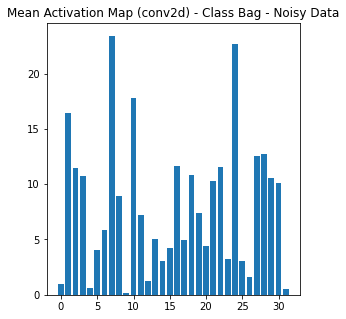

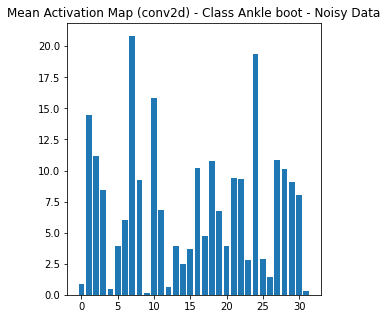

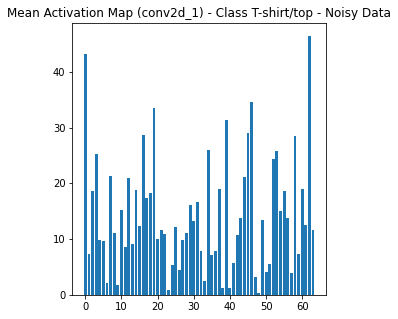

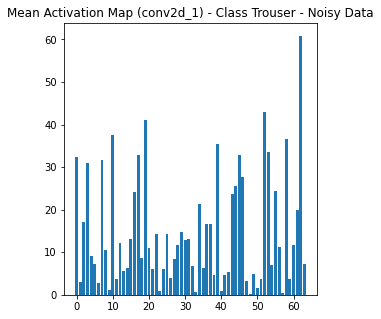

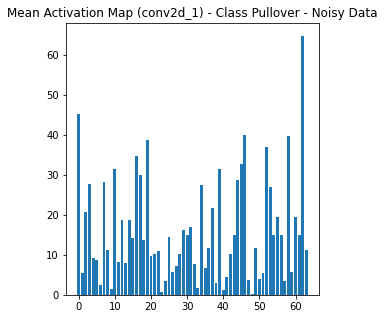

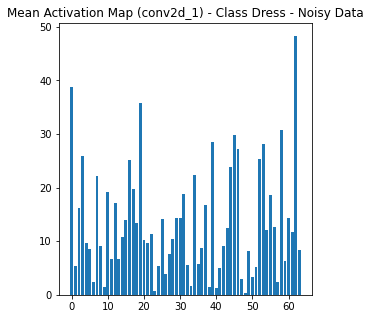

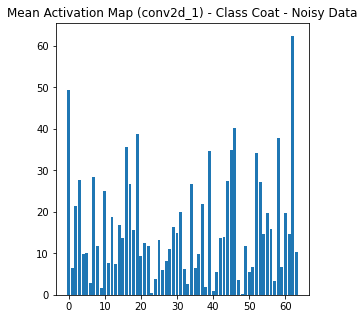

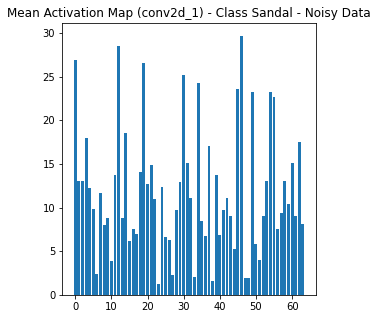

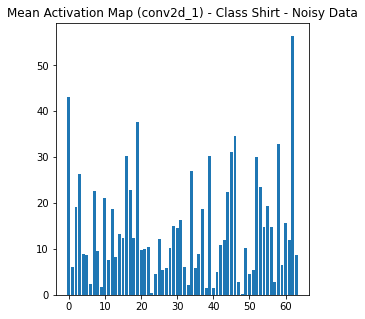

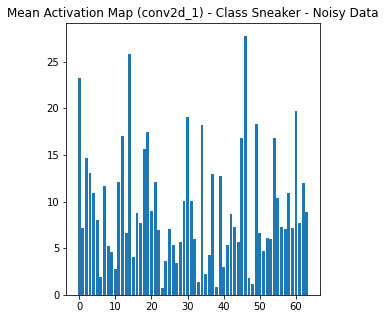

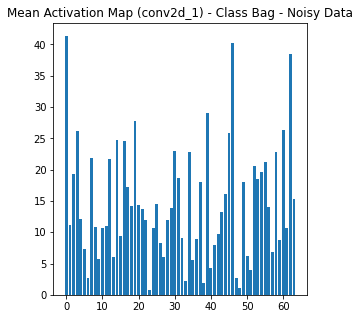

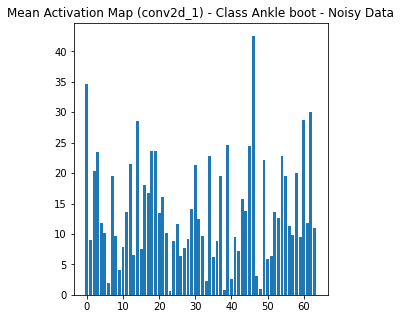

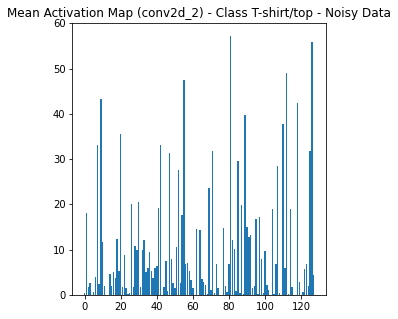

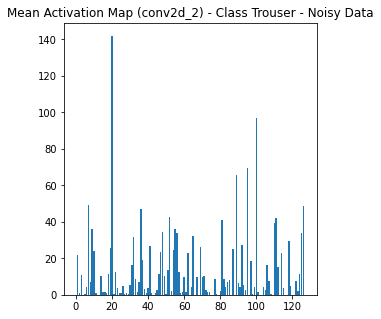

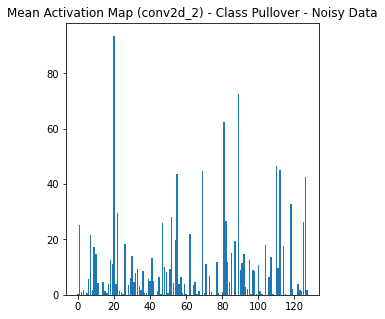

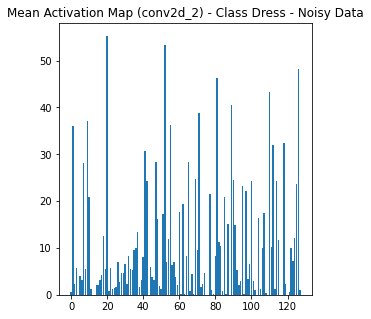

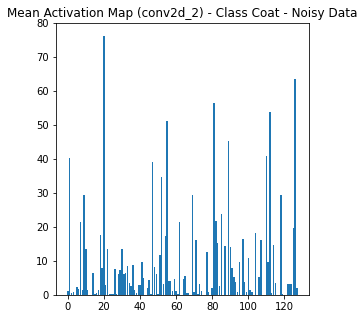

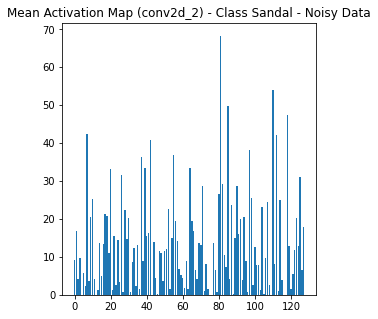

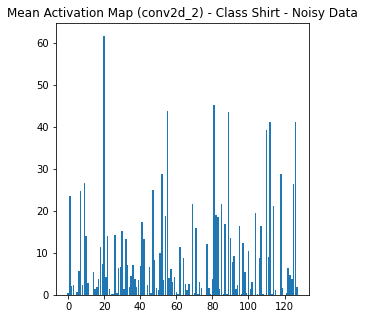

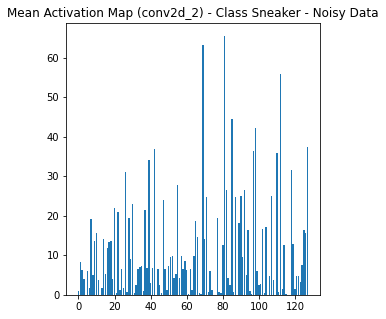

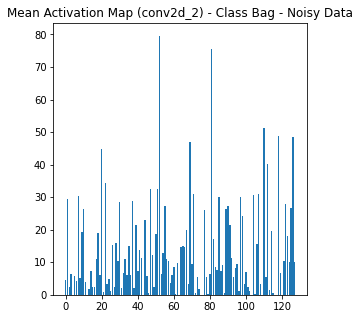

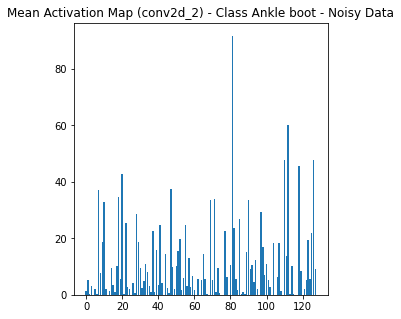

In [ ]:
# Define a new Model to get intermediate representations for all layers in the previous model after the first.
successive_outputs = [layer.output for layer in Net.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=Net.input, outputs=successive_outputs)

# Get the intermediate representations for real data
successive_feature_maps_real = visualization_model.predict(all_noise_maps)

# Retrieve the names of the layers
layer_names = [layer.name for layer in Net.layers]

# Loop over the layers
for layer_name, feature_map_noise in zip(layer_names, successive_feature_maps_real):
  if 'conv' not in layer_name:
    continue

  # Get the number of filters in the current layer
  n_filters = feature_map_noise.shape[-1]

  # Define class item names
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  # Define the digits to generate noise maps for
  num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  # Loop over the classes
  for class_idx in num_classes:
    # Select the feature maps that correspond to the target class
    target_indices = np.where(all_labels == class_idx)[0]
    feature_maps_noise = feature_map_noise[target_indices]

    # Get the mean activation maps for real data and noise data separately
    mean_activation_map_noise = np.mean(feature_maps_noise, axis=(0,1,2))

    # Plot the mean activation maps for real and noise data side by side
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title(f"Mean Activation Map ({layer_name}) - Class {class_names[class_idx]} - Noisy Data")
    plt.bar(range(n_filters), mean_activation_map_noise)
    plt.show()